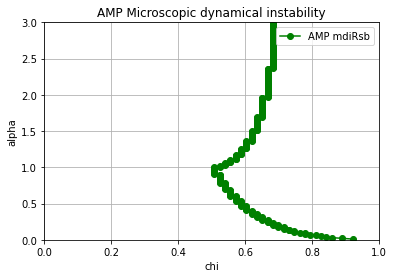

In [1]:
#Homework7 Microscopic dynamical instability or replica symmetry breaking (RSB)
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import time
start_time = time.time()

def y_s(p,t):#using iteration to solve y^*
    eps = 1e-12 #epsilon
    y_st = 1 #initial y^*
    y_pre = 0
    while LA.norm(y_st-y_pre)>eps:
        y_pre = y_st
        y_st = np.tanh(p+np.sqrt(t)*y_pre)*np.sqrt(t)
    return y_st

def F(p,t):
    return y_s(p,t)/(np.sqrt(t))

def T(p,t): #T function
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def se2(alpha,chi):
    k_t = 0.01
    sigma_s2 = 1
    sigma_t2 = 0
    eps = 1e-6
    parameter_old = np.array([k_t,sigma_t2])
    parameter_new = np.array([1,1])
    iter_ = 0
    k_collec = []
    sigma_collec = []
    k_collec.append(0.01)
    sigma_collec.append(sigma_t2)
    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([k_t,sigma_t2])
        sum_f = 0
        sum_f2 = 0
        iter_+=1
        for z in np.arange(-10,10,0.1):
            sum_f += np.exp(-1/2*z**2)*F(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi)/np.sqrt(2*np.pi)/10
            sum_f2 += np.exp(-1/2*z**2)*F(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi)**2/np.sqrt(2*np.pi)/10
        k_new = alpha*chi*sum_f
        sigma_new = alpha*chi**2*sum_f2
        parameter_new = np.array([k_new,sigma_new])
        k_collec.append(k_new)
        sigma_collec.append(sigma_new)
        k_t = k_new
        sigma_t2 = sigma_new
    return iter_,k_collec,sigma_collec

def mdiRsb(alpha,chi):
    sigma_s2=1
    k=se2(alpha,chi)[1][-1]
    sigma_2=se2(alpha,chi)[2][-1]
    sum_t = 0
    for z in np.arange(-10,10,0.1):
        sum_t += np.exp(-1/2*z**2)*T(k*sigma_s2+np.sqrt(k**2*sigma_s2+sigma_2)*z,chi)**2/np.sqrt(2*np.pi)/10
    return alpha*chi**2*sum_t

alpc = []
chic = []
for i in np.arange(0,3,0.01):
    l = 0
    r = 1
    m = (l+r)/2
    flag=0
    while l<=r:
        if mdiRsb(i,m)<1:
            l = m+0.01
        else:
            r = m-0.01
            flag=1
        m = (l+r)/2
    if flag ==1:
        alpc.append(i)
        chic.append(m)
plt.plot(chic,alpc,c="g",label="AMP mdiRsb",marker="o")
plt.title("AMP Microscopic dynamical instability")
plt.ylabel("alpha")
plt.xlabel("chi")
plt.xlim(0,1)
plt.ylim(0,3)
plt.grid()
plt.legend()
plt.show()    

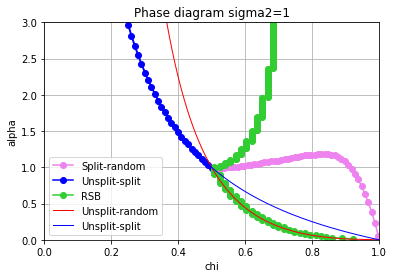

In [31]:
Unsplit_random_alpha = []
Unsplit_random_chi = []
Unsplit_split_chi = []
for i in np.arange(0,3,0.01):
    Unsplit_random_alpha.append(i)
    Unsplit_random_chi.append(1/(1+np.sqrt(i)))
    Unsplit_split_chi.append(1/(1+i))
    
USchi = []
USalpha= []
for chi in np.arange(0.01,min(chic),0.01):
    eps=1e-4
    l = 0
    r = 3
    m = (l+r)/2
    flag = 0
    while l<=r:
        if se2(m,chi)[1][-1]>eps:
            flag = 1
            r = m-0.01
        else:
            l = m+0.01
        m = (l+r)/2
    if flag:
        USchi.append(chi)
        USalpha.append(m)
        
Split_random_alpha = []
Split_random_chi = []
for chi in np.arange(min(chic),1,0.01):
    eps=1e-4
    l = 0
    r = 3
    m = (l+r)/2
    flag = 0
    while l<=r:
        if se2(m,chi)[1][-1]>eps:
            flag = 1
            r = m-0.01
        else:
            l = m+0.01
        m = (l+r)/2
    if flag:
        Split_random_chi.append(chi)
        Split_random_alpha.append(m)

plt.plot(Split_random_chi,Split_random_alpha,c="violet",label="Split-random",marker="o")        
plt.plot(USchi,USalpha,c="b",label="Unsplit-split",marker="o")    
plt.plot(chic,alpc,c="limegreen",label="RSB",marker="o")
plt.plot(Unsplit_random_chi,Unsplit_random_alpha,"r-",label="Unsplit-random",linewidth=1)
plt.plot(Unsplit_split_chi,Unsplit_random_alpha,"b-",label="Unsplit-split",linewidth=1)
plt.title("Phase diagram sigma2=1")
plt.ylabel("alpha")
plt.xlabel("chi")
plt.xlim(0,1)
plt.ylim(0,3)
plt.grid()
plt.legend()
plt.show()     